<a href="https://colab.research.google.com/github/mishra-suyash/stock-anish/blob/main/handwritten_reco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2937 - accuracy: 0.9154
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1420 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1071 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0882 - accuracy: 0.9725
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9797
Test accuracy: 0.9797000288963318
313/313 [==============================] - 1s 2ms/step


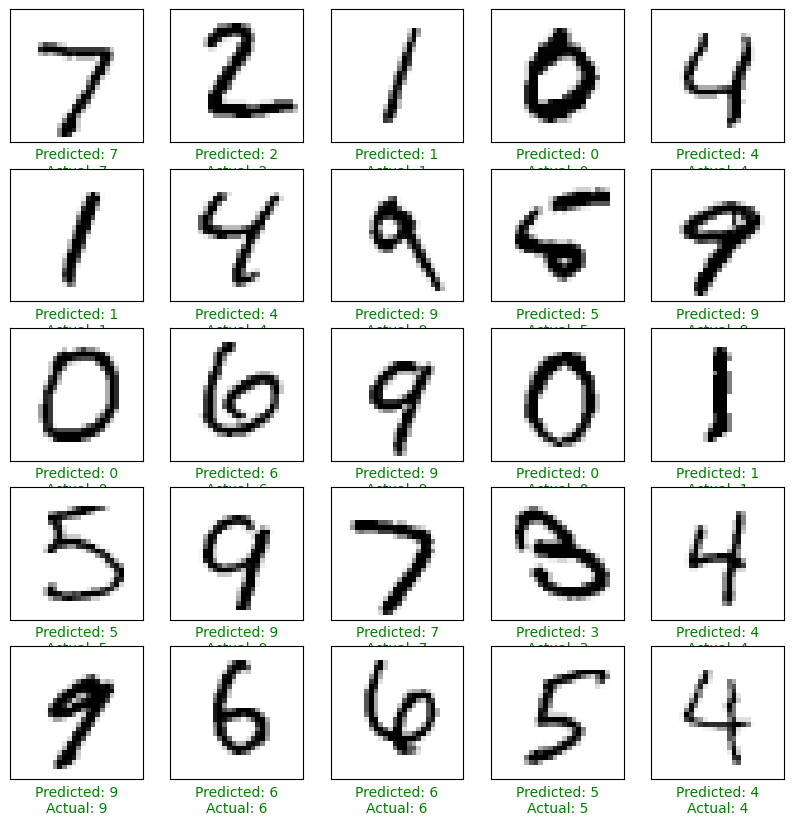

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Make predictions
predictions = model.predict(test_images)

# Show some predictions and their actual labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions[i])
    actual_label = test_labels[i]
    if predicted_label == actual_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Predicted: {predicted_label}\nActual: {actual_label}", color=color)
plt.show()
